In [1]:
# installed required libraries and packages

import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
# Loading the dataset, downloading, transforming input data into tensors
# MNIST are handdrawn digits

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = train = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
"""(we basically do this when we are dealing with large our model might take more time so we divide
    our data into batches we will pass the data into our model in batches.
"""

# Data Loader

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
# accesing 8 element from above output

x, y = data[0][0], data[1][0]

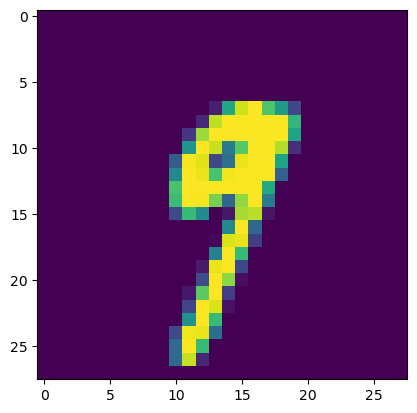

In [6]:
# Plotting the x with matplotlib

import matplotlib.pyplot as plt

plt.imshow(data[0][8].reshape(28,28))
plt.show()

In [7]:
# To check if the data is balanced or not

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
    
print(counter_dict)

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [8]:
# Percentage form

for data in counter_dict:
    print(f"{data}: {(counter_dict[int(data)]/total)*100}")

0: 9.8
1: 11.35
2: 10.32
3: 10.100000000000001
4: 9.82
5: 8.92
6: 9.58
7: 10.280000000000001
8: 9.74
9: 10.09


## Building Neural Network

### Defining the Layer

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # we used super method because we are inheriting nn.module that means current class is child class so we are asking parent class to initilaze
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x): # Feeding data into neural network
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) 
     
net = Net()
#print(net)


In [20]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad() # setting all the gradients to zero 
        output = net(X.reshape(-1, 28*28))
        loss = F.nll_loss(output, y) # caluclating the loss 
        loss.backward() # Backpropagation
        optimizer.step()
        
    print(loss)

tensor(0.1789, grad_fn=<NllLossBackward0>)
tensor(0.0392, grad_fn=<NllLossBackward0>)
tensor(0.1058, grad_fn=<NllLossBackward0>)


In [11]:
print(output.shape)
print(y.shape)

torch.Size([10, 10])
torch.Size([10])


In [15]:
print(X.shape)
print(y.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if (torch.argmax(i) == y[idx]):
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.96
